# Rideshare Practice Analysis
---
## Observations
* While Urban use of services represents 62.7% of fares collected, it also accounts for 68.4% of rides leading to lower average fares.
* Rural use of services represents only 6.8% of fares collected, but has the highest average fares accounting for 8 of the top 10 spots for average fares.  In contrast, the best average fare for an Urban use is rank 44th.
* There does not seem to be any obvious correlation between the number of available drivers or rides-per-available-driver and average fares.
---
### Setup

In [1]:
%matplotlib inline
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Source Data (Remember to change these)
city_data_path = "data/city_data.csv"
ride_data_path = "data/ride_data.csv"

In [3]:
# Read the City and Ride Data
raw_city = pd.read_csv(city_data_path)
raw_ride = pd.read_csv(ride_data_path)

# Combine the data into a single dataset
raw_merge = pd.merge(raw_ride, raw_city, on="city")

# Display the data table for preview
raw_merge.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [4]:
# Group data by city
city_grp = raw_merge.groupby("city")
city_summ = raw_city[["city", "driver_count", "type"]]

# Find average fare per ride per city
grp_info = pd.DataFrame(city_grp["fare"].mean())
grp_info = grp_info.rename(columns={"fare":"raw_avg_fare"})

# Find total number of rides per city
grp_info["ride_count"] = city_grp["ride_id"].count()

city_summ = pd.merge(grp_info, city_summ, on="city")

# Display full results
with pd.option_context("display.max_rows", None):
    display(city_summ)

,city,raw_avg_fare,ride_count,driver_count,type
0,Amandaburgh,24.641667,18,12,Urban
1,Barajasview,25.332273,22,26,Urban
2,Barronchester,36.422500,16,11,Suburban
3,Bethanyland,32.956111,18,22,Suburban
4,Bradshawfurt,40.064000,10,7,Rural
5,Brandonfort,35.437368,19,10,Suburban
6,Carriemouth,28.314444,27,52,Urban
7,Christopherfurt,24.501852,27,41,Urban
8,Colemanland,30.894545,22,23,Suburban
9,Davidfurt,31.995882,17,23,Suburban


---
### Bubble Plot of Ride Sharing Data

In [5]:
#  Uncomment next line to plot the largest bubbles at the bottom
#city_summ = city_summ.sort_values("driver_count", ascending=False)

# Separate the data based on the three city types
urban_summ = city_summ.loc[city_summ["type"] == "Urban"]
subur_summ = city_summ.loc[city_summ["type"] == "Suburban"]
rural_summ = city_summ.loc[city_summ["type"] == "Rural"]

# Extract coordinates for plotting
ux = urban_summ["ride_count"].tolist()
uy = urban_summ["raw_avg_fare"].tolist()
ub = [10*i for i in urban_summ["driver_count"].tolist()]

sx = subur_summ["ride_count"].tolist()
sy = subur_summ["raw_avg_fare"].tolist()
sb = [10*i for i in subur_summ["driver_count"].tolist()]

rx = rural_summ["ride_count"].tolist()
ry = rural_summ["raw_avg_fare"].tolist()
rb = [10*i for i in rural_summ["driver_count"].tolist()]

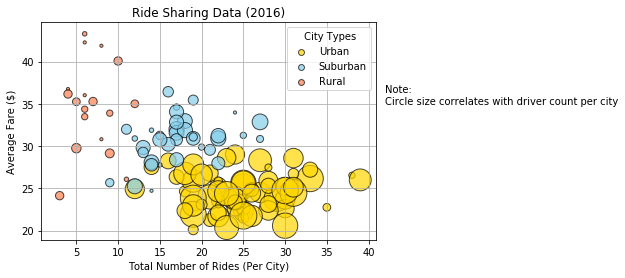

In [6]:
# Build the scatter plots for each city types
urban_plt = plt.scatter(ux, uy, s=ub, label='Urban', c='gold',  
                        alpha=0.7, edgecolor='black')
subur_plt = plt.scatter(sx, sy, s=sb, label="Suburban", c='skyblue',
                        alpha=0.7, edgecolor='black')
rural_plt = plt.scatter(rx, ry, s=rb, label="Rural", c='coral',
                        alpha=0.7, edgecolor='black')

# Incorporate the other graph properties
plt.title("Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
lgnd = plt.legend(loc="upper right", title=" City Types", markerscale=0.5)
for i in range(len(lgnd.legendHandles)):
    lgnd.legendHandles[i]._sizes = [35]

# Incorporate a text label regarding circle size
note = plt.text(42, 35, "Note:\nCircle size correlates with driver count per city")

# Save and display results
plt.savefig("Ride Share Bubble Fig.png", bbox_inches="tight", bbox_extra_artists=[note])
plt.show()

In [7]:
plt.close()

---
### Total Fares by City Type

In [8]:
# Function to create a list for exploding the largest value in a series
def explode_largest(data, amount):
    size = len(data)
    high = max(data)
    count = data.count(high)
    found = 0
    result = [0.] * size

    for i in range(count):
        temp = data.index(high, found, size)
        result[temp] = amount
        found = temp+1
    return result

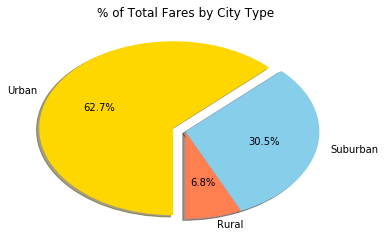

In [9]:
# Group data by types for the following 3 charts
type_grp = raw_merge.groupby("type")
type_fares = pd.DataFrame(type_grp["fare"].sum())
total_fares = raw_merge["fare"].sum()

# Calculate Fare Percents
type_fares["fare_pct"] = type_fares/total_fares
slices = type_fares["fare_pct"].tolist()
colors = ["coral", "skyblue", "gold"]

# Build Pie Chart
fares_pie = plt.pie(slices,
                    labels=type_fares.index.tolist(),
                    autopct="%1.1f%%",
                    explode=explode_largest(slices, .1),
                    colors=colors,
                    shadow=True,
                    startangle=270
                   )
plt.title("% of Total Fares by City Type")

# Save and show results
plt.savefig("City Fares Pie.png", bbox_inches="tight")
plt.show()

In [10]:
plt.close()

---
### Total Rides by City Type

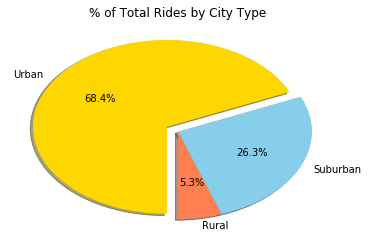

In [11]:
# Calculate Ride Percents
type_rides = pd.DataFrame(type_grp["ride_id"].count())
total_rides = raw_merge["ride_id"].count()

type_rides["ride_pct"] = type_rides/total_rides
slices = type_rides["ride_pct"].tolist()
colors = ["coral", "skyblue", "gold"]

# Build Pie Chart
rides_pie = plt.pie(slices,
                    labels=type_rides.index.tolist(),
                    autopct="%1.1f%%",
                    explode=explode_largest(slices, .1),
                    colors=colors,
                    shadow=True,
                    startangle=270
                   )
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("City Rides Pie.png", bbox_inches="tight")
plt.show()

In [12]:
plt.close()

---
### Total Drivers by City Type

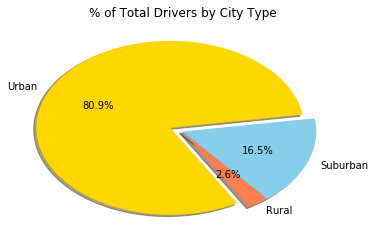

In [13]:
# Calculate Driver Percents
type_drivers = pd.DataFrame(city_summ.groupby("type")["driver_count"].sum())
total_drivers = city_summ["driver_count"].sum()

type_drivers["driver_pct"] = type_drivers/total_drivers
slices = type_drivers["driver_pct"].tolist()
colors = ["coral", "skyblue", "gold"]

# Build Pie Chart
drivers_pie = plt.pie(slices,
                    labels=type_drivers.index.tolist(),
                    autopct="%1.1f%%",
                    explode=explode_largest(slices, .1),
                    colors=colors,
                    shadow=True,
                    startangle=300 #unnecessary angle adjustment to look like pac-man eating
                   )
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("City Drivers Pie.png", bbox_inches="tight")
plt.show()

In [14]:
plt.close()

---
## Cities Ranked by Average Fares

In [15]:
# Determine how many rides were utilized per available driver
city_summ["rides_per_driver"] = city_summ["ride_count"] / city_summ["driver_count"]

# Display the average and summary table of top 10 - adjust based on desired rankings
print("Avg Rides per Driver" + str(city_summ["rides_per_driver"].mean()))
city_summ.set_index("city").sort_values("raw_avg_fare", ascending=False).head(10)

Avg Rides per Driver2.0380303327158096


,raw_avg_fare,ride_count,driver_count,type,rides_per_driver
city,,,,,
New Ryantown,43.278333,6,2,Rural,3.000000
Taylorhaven,42.263333,6,1,Rural,6.000000
South Marychester,41.870000,8,1,Rural,8.000000
Bradshawfurt,40.064000,10,7,Rural,1.428571
Newtonview,36.745000,4,1,Rural,4.000000
Barronchester,36.422500,16,11,Suburban,1.454545
South Saramouth,36.160000,4,7,Rural,0.571429
Jessicaport,36.013333,6,1,Rural,6.000000
Brandonfort,35.437368,19,10,Suburban,1.900000
